# Quizz 1
- Student: Mai Pham
- File choose to practice: `106-abraham-mi.txt`
- My Github repo: https://github.com/thimaipham/CEU_Data_Text_Analysis

In [1]:
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import pearsonr
import pandas as pd


In [2]:
os.getcwd()

'C:\\Users\\maiph\\Downloads\\2. CEU Winter Term\\Python-Programming-and-Text-Analysis\\Assignment and Quizz'

In [3]:
os.chdir("C:\\Users\\maiph\\Downloads\\2. CEU Winter Term\\Python-Programming-and-Text-Analysis")

In [4]:
file_path = "Inputs\\106-extracted-date\\106-abraham-mi.txt"

# Function to read and extract speech
def extract_speeches(file_path):
    with open(file_path, 'r', encoding='latin1', errors='ignore') as file:
        content = file.read()
    # Use regular expressions to split each speech 
    speeches = re.findall('<DOC>(.*?)</DOC>', content, re.DOTALL)
    
    cleaned_speeches = []
    
    for speech in speeches:
        clean_speech = re.sub('<.*?>', '', speech).strip()
        cleaned_speeches.append(clean_speech)
    
    return cleaned_speeches

# Use the functions
speeches = extract_speeches(file_path)

# Print the results
print(f"Found {len(speeches)} speeches.") #number of speech found
print("Example of the first speech:")
print(speeches[0][:500])  #first 500 characters of the first speech


Found 641 speeches.
Example of the first speech:
106-abraham-mi-1-20001215

   Mr. ABRAHAM. Mr. President, today I rise to comment on a development that took place in my State this week. It was with great sadness that I heard of the phasing out of the Oldsmobile line of cars within the General Motors family. Over the last 105 years, Oldsmobile has been a Lansing, MI, and a State institution and, obviously, a national and international one as well. It was started 105 years ago when Ransom Eli Olds of Lansing, MI, teamed with Frank Clark, the so


In [5]:
# Take stopword list in English
stop_words = set(stopwords.words('english'))

# Function preprocessing text
def preprocess_text(text, stop_words):
    # turn text into lower case
    text = text.lower()
    # Remove special characters and punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    word_tokens = word_tokenize(text)
    # Remove stopwords and words with the length smaller than 2 characters
    filtered_text = [word for word in word_tokens if word not in stop_words and len(word) > 2]
    return ' '.join(filtered_text)

# Apply function
preprocessed_speeches = [preprocess_text(speech, stop_words) for speech in speeches]

# Print the results
print(f"Processed {len(preprocessed_speeches)} speeches.")
print("Example of the first processed speech:")
print(preprocessed_speeches[0][:500])



Processed 641 speeches.
Example of the first processed speech:
106abrahammi120001215 abraham president today rise comment development took place state week great sadness heard phasing oldsmobile line cars within general motors family last 105 years oldsmobile lansing state institution obviously national international one well started 105 years ago ransom eli olds lansing teamed frank clark son small carriage shop operator achieve many believed impossible successfully produced selfcontained gasolinepowered carriage oldsmobile officially born 1897 throughout 


In [6]:
# Vectorize the text
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_speeches)

# Calculate Cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix).flatten()
rounded_similarities = np.round(cosine_similarities, 3)  

# Create a list of tuples containing the index and similarity value for each speech
indexed_similarities = [(index, sim) for index, sim in enumerate(rounded_similarities)]

# Sort the speeches based on their similarity values in descending order
sorted_similarities = sorted(indexed_similarities, key=lambda x: x[1], reverse=True)

# Select the top 10 speeches, excluding the first one since it's the reference speech itself
top_10_similar_speeches = sorted_similarities[1:11]

# Print the indexes and similarity values of these top 10 speeches
for index, sim in top_10_similar_speeches:
    print(f"Speech number {index} has a similarity of {sim}")


Speech number 478 has a similarity of 0.117
Speech number 183 has a similarity of 0.111
Speech number 136 has a similarity of 0.104
Speech number 367 has a similarity of 0.089
Speech number 164 has a similarity of 0.083
Speech number 13 has a similarity of 0.082
Speech number 95 has a similarity of 0.079
Speech number 135 has a similarity of 0.078
Speech number 386 has a similarity of 0.076
Speech number 12 has a similarity of 0.074


### 1. Most similar speech to the very first speech
From the results, the most similar speech to the first one is Speech number (index) 478 with a similarity of 0.117. This is the highest similarity score among the top 10 listed, making it the most similar speech to the first one according to the cosine similarity measure.

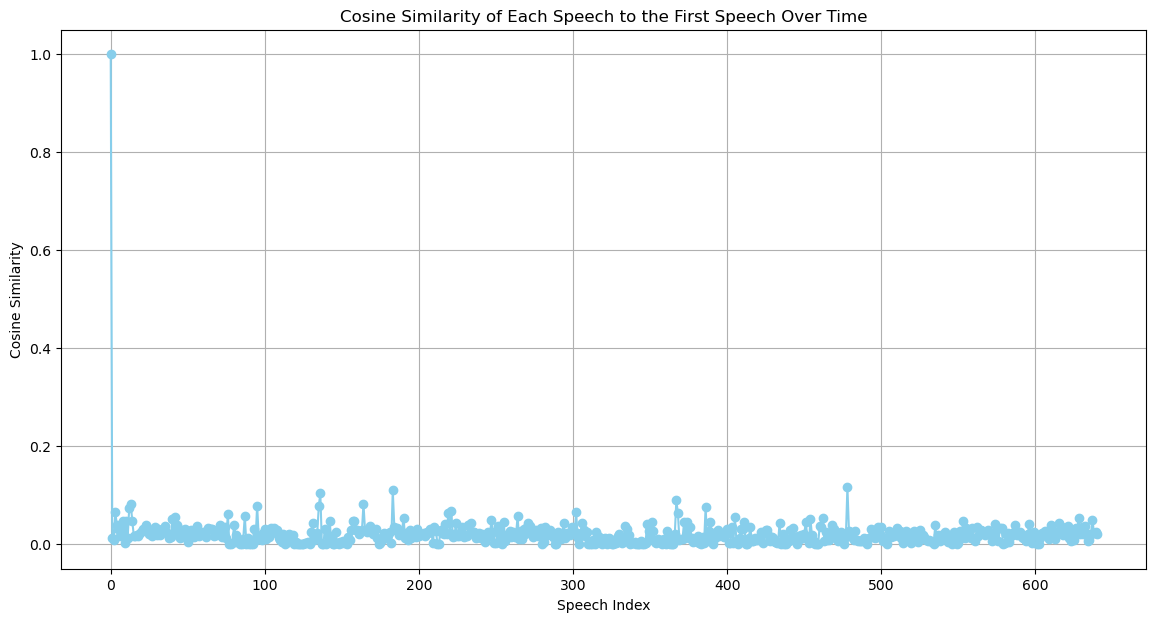

In [7]:
# Plot the results
indexes = range(len(cosine_similarities))

plt.figure(figsize=(14, 7))
plt.plot(indexes, cosine_similarities, marker='o', linestyle='-', color='skyblue')
plt.title('Cosine Similarity of Each Speech to the First Speech Over Time')
plt.xlabel('Speech Index')
plt.ylabel('Cosine Similarity')
plt.grid(True)
plt.show()


### 2. Are the speeches becoming more similar or dissimilar over time?
- **General Low Similarity**: After the first speech, the similarity scores appear to be quite low for the majority of the other speeches, with most values hovering close to 0 (maximum value is 0.117). This suggests that, in general, subsequent speeches were not very similar to the first speech.
- **No Strong Trend Over Time**: There is no clear increasing or decreasing trend in the similarity scores as time progresses (based on the speech index). The plot shows that the similarity values vary, but without a discernible pattern indicating a trend over time.
- **Few Outliers with Higher Similarity**: There are a few speeches that have higher similarity scores compared to others and all of them are low similarity (the highest value is 0.117), but these are relatively rare and don't form a consistent pattern.


### 3.  Explore different measures of similarity
I choose Pearson correlation because it assesses the strength and direction of a linear relationship between two variables. In text analysis, these variables are the word frequencies in two documents. If two speeches have similar patterns of word usage, even if the actual word counts are different, the Pearson correlation will be high. This can capture similarity in a way that cosine similarity, which looks at the angle between two vectors in a multi-dimensional space, may not.

In [8]:


# Calculate Pearson correlation for each speech with the first one
#pearson_correlations = [np.corrcoef(tfidf_matrix[0].toarray(), tfidf_matrix[i].toarray())[0, 1] 
                        #for i in range(1, len(preprocessed_speeches))]  # Exclude the first speech


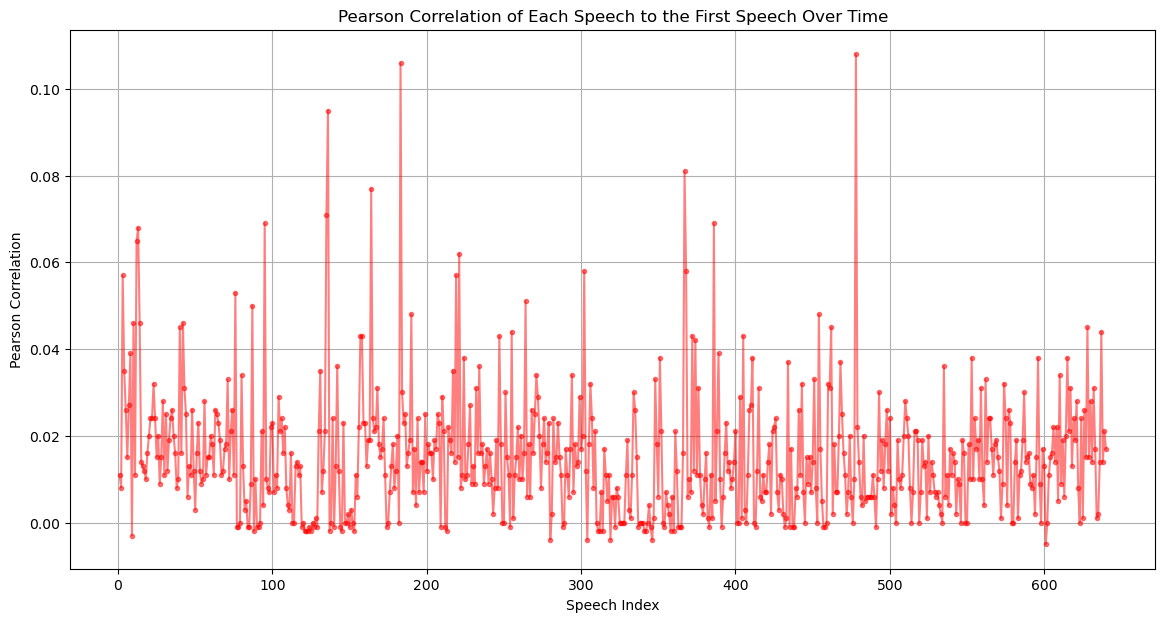

In [9]:
# Convert the sparse matrix to a dense matrix
dense_matrix = tfidf_matrix.todense()

# Calculate Pearson correlation for each speech with the first one
pearson_correlations = []
for i in range(1, dense_matrix.shape[0]):  # Starting from the second speech
    # Flatten the matrices to 1D arrays to compute Pearson correlation
    corr, _ = pearsonr(dense_matrix[0].A1, dense_matrix[i].A1)
    pearson_correlations.append(np.round(corr, 3))

# Plot the results
indexes2 = range(1, len(pearson_correlations) + 1)  # Adjust the range to start from 1

plt.figure(figsize=(14, 7))
plt.plot(indexes2, pearson_correlations, marker='o', linestyle='-', color='r', markersize=3, alpha=0.5)
plt.title('Pearson Correlation of Each Speech to the First Speech Over Time')
plt.xlabel('Speech Index')
plt.ylabel('Pearson Correlation')
plt.grid(True)
plt.show()

Similar to the cosine similarity plot, this graph can be used to look for patterns in how speeches relate to the initial one and it gives quite same results compared to cosine similarity:

- **Overall Low Correlation**: The Pearson correlation values are generally quite low, indicating that most speeches do not have a strong linear relationship with the first speech. This is consistent with the results from the cosine similarity analysis, which also showed a generally low level of similarity.
- **Variability**: There's significant variability in the correlation values. Some speeches have a slightly higher correlation, indicating a greater similarity in the usage pattern of words, but these are not very common.
- **No Clear Trend**: Just as with the cosine similarity plot, there doesn't appear to be a clear trend indicating that the speeches are becoming more or less similar over time. The correlation values fluctuate without showing a clear pattern.

### 4. Extra points

In [10]:
droplist_file_path = 'Inputs\\droplist.txt'

# Read the droplist file and create a list of additional stopwords
with open(droplist_file_path, 'r') as file:
    additional_stopwords = file.read().splitlines()

# Extend your existing list of stopwords with this new list
stop_words2 = set(stopwords.words('english')) | set(additional_stopwords)

# Re-preprocess all speeches using the updated stopwords list
preprocessed_speeches2 = [preprocess_text(speech, stop_words2) for speech in speeches]

In [11]:
# Vectorize the text
vectorizer2 = TfidfVectorizer()
tfidf_matrix2 = vectorizer2.fit_transform(preprocessed_speeches2)

# Calculate Cosine similarity
cosine_similarities2 = cosine_similarity(tfidf_matrix2[0:1], tfidf_matrix2).flatten()
rounded_similarities2 = np.round(cosine_similarities2, 3)  

# Create a list of tuples containing the index and similarity value for each speech
indexed_similarities2 = [(index, sim) for index, sim in enumerate(rounded_similarities2)]

# Sort the speeches based on their similarity values in descending order
sorted_similarities2 = sorted(indexed_similarities2, key=lambda x: x[1], reverse=True)

# Select the top 10 speeches, excluding the first one since it's the reference speech itself
top_10_similar_speeches2 = sorted_similarities2[1:11]

# Convert lists of tuples to dataframes
df_before = pd.DataFrame(top_10_similar_speeches, columns=['Speech Index', 'Similarity (Before)'])
df_after = pd.DataFrame(top_10_similar_speeches2, columns=['Speech Index', 'Similarity (After)'])

# Set the index to the speech index for both dataframes for easy comparison
df_before.set_index('Speech Index', inplace=True)
df_after.set_index('Speech Index', inplace=True)

# Concatenate the two dataframes along the columns
df_comparison = pd.concat([df_before, df_after], axis=1)

df_comparison


,Similarity (Before),Similarity (After)
Speech Index,,
478,0.117,0.117
183,0.111,0.111
136,0.104,0.104
367,0.089,0.089
164,0.083,0.083
13,0.082,0.082
95,0.079,0.079
135,0.078,0.078
386,0.076,0.076


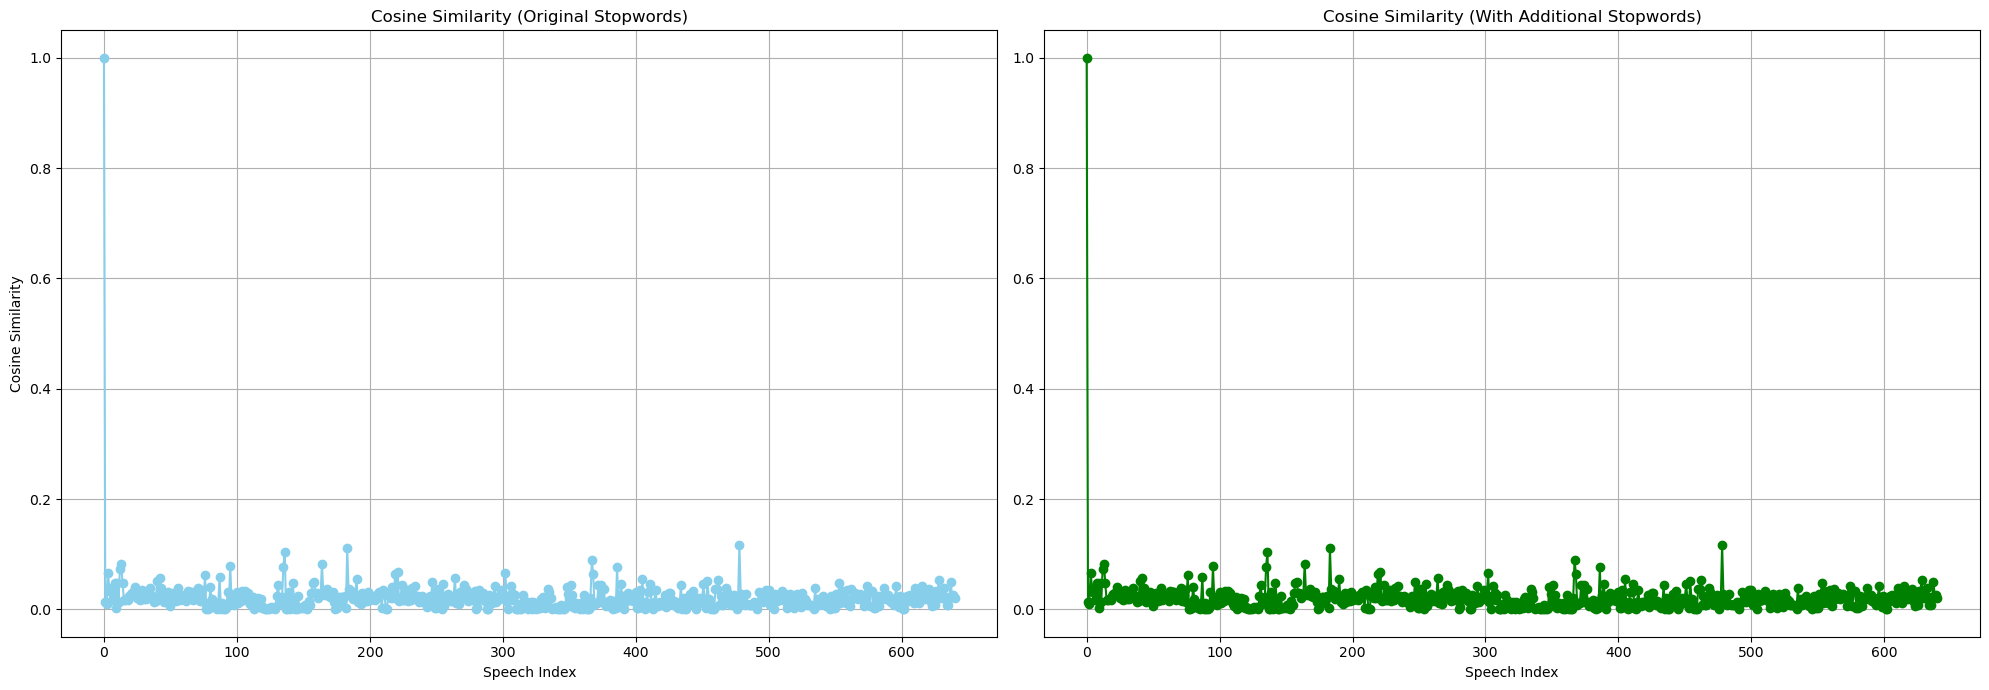

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# Plot the original cosine similarities
ax1.plot(indexes, cosine_similarities, marker='o', linestyle='-', color='skyblue')
ax1.set_title('Cosine Similarity (Original Stopwords)')
ax1.set_xlabel('Speech Index')
ax1.set_ylabel('Cosine Similarity')
ax1.grid(True)

# Plot the cosine similarities with additional stopwords
ax2.plot(indexes, cosine_similarities2, marker='o', linestyle='-', color='green')
ax2.set_title('Cosine Similarity (With Additional Stopwords)')
ax2.set_xlabel('Speech Index')
ax2.grid(True)


plt.tight_layout()
plt.show()


### In conclusion:
After conducting a thorough analysis of the similarity measures both before and after incorporating additional stopwords from the 'droplist.txt,' it appears that there is no significant difference in the results. The similarity scores remained largely consistent, suggesting that the additional stopwords did not have a substantial impact on the semantic similarity of the speeches. This could indicate that the extra stopwords were not prominent in the analyzed text or that their presence did not alter the underlying thematic content significantly.